# "Convolution with Julia Language"
> "Signals and Signal Processing Module"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing]

# Convolution

In DSP, Convolution is an important operation and has many other uses. 

Let's understand  how a Linear system changes an input signal into an output signal. First, the input signal can be decomposed into a set of impulses, each of which can be viewed as a scaled and shifted delta function. Second, the output resulting from each impulse is a scaled and shifted version of the impulse response. Third, the overall output signal can be found by adding these scaled and shifted impulse responses. In other words, if we know a system's impulse response, then we can calculate what the output will be for any possible input signal. This means we know everything about the system. There is nothing more that can be learned about a linear system's characteristics. 

Convolution is a formal mathematical operation, just as multiplication, addition, and integration. Addition takes two numbers and produces a third number, while convolution takes two signals and produces a third signal. Convolution is used in the mathematics of many fields, such as probability and statistics. In linear systems, convolution is used to describe the relationship between three signals of interest: the input signal, the impulse response, and the output signal.

Just as addition is represented by the plus, +, and multiplication by the cross, ×, convolution is represented by the star, *. It is unfortunate that most programming languages also use the star to indicate multiplication. This is also true for the Julia Language.

An input signal, ``x[n]``, enters a linear system with an impulse response, ``h[n]``, resulting in an output signal, ``y[n]``. 

In equation form: 

$$y[n] = x[n] * h[n]$$


In most DSP applications, the input signal is hundreds, thousands, or even millions of samples in length. The impulse response is usually much shorter, say, a few points to a few hundred points. 

The mathematics behind convolution doesn't restrict how long these signals are. It does, however, specify the length of the output signal. The length of the output signal is
equal to the length of the input signal, plus the length of the impulse response, minus one. 

Now we come to the detailed mathematics of convolution. As used in Digital Signal Processing, convolution can be understood in two separate ways. The first looks at convolution from the viewpoint of the input signal. This involves analyzing how each sample in the input signal contributes to many points in the output signal. The second way looks at convolution from the viewpoint of the output signal. This examines how each sample in the output signal has received information from many points in the input signal.

Keep in mind that these two perspectives are different ways of thinking about the same mathematical operation.



In [3]:
# Load Modules

using MySignalProcessing
using Plots

## Building our Signals

Julia language is known to be a highly composable Language. 

This means that higher order functions are made of other functions. This is a very powerful tool in DSP.

We build our signals by performing a series of operations on the signal, as the following example shows.

```julia
X = stepseq(-5,50) + (-1) * (stepseq(0,40) |> sigshift(10))
```

Let the rectangular pulse:

$$x(n) = u(n) - u(n - 10)$$

be an input to an LTI System with Impulse Response:

$$h(n) = (0.9)^n u(n)$$

## Input Signal

In [33]:
x = stepseq(-5,50) + (-1) * (stepseq(0,40) |> sigshift(10))

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

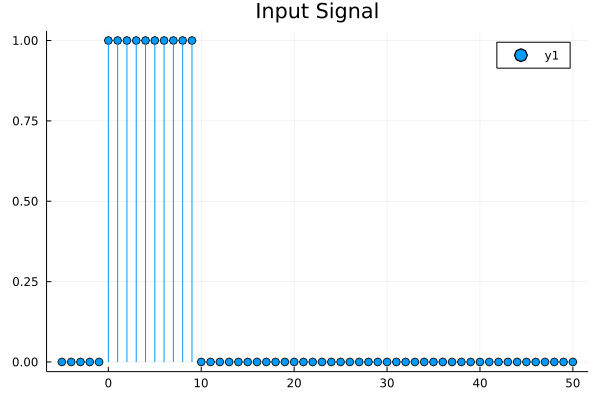

In [34]:
#Plotting the Input signal

plot(x.n, X.A, line =:stem, marker=:o, title = "Input Signal")

## Impulse Response

In [35]:
h = (signal(0.0, -5,50) + realexp(0.9, 0, 50))

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.9, 0.81, 0.7290000000000001, 0.6561  …  0.013302794647291146, 0.011972515182562033, 0.01077526366430583, 0.009697737297875247, 0.008727963568087723, 0.00785516721127895, 0.007069650490151055, 0.00636268544113595, 0.005726416897022355, 0.00515377520732012], Real[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

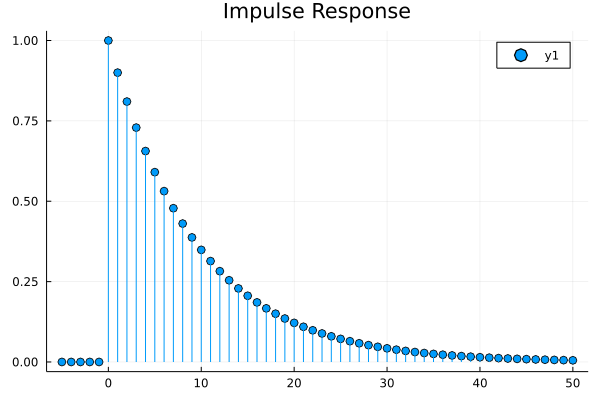

In [36]:
# Plotting the Impulse Response

plot(h.n, h.A, line =:stem, marker=:o, title = "Impulse Response")

## Convolution

Now that we have our input and Impulse Response signals, we can just call the convolution function.

```julia
y = conv(x,h)
```

In [37]:
y = conv(x, h)

signal(Real[-1.2688263138573217e-16, -6.344131569286608e-16, -7.61295788314393e-16, -2.5376526277146434e-16, 1.2688263138573217e-16, -5.075305255429287e-16, -5.075305255429287e-16, -2.5376526277146434e-16, 0.0, -5.075305255429287e-16  …  -5.075305255429287e-16, 0.0, -2.5376526277146434e-16, -2.5376526277146434e-16, 2.5376526277146434e-16, 0.0, 5.075305255429287e-16, 0.0, -1.2688263138573217e-16, -5.075305255429287e-16], Real[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

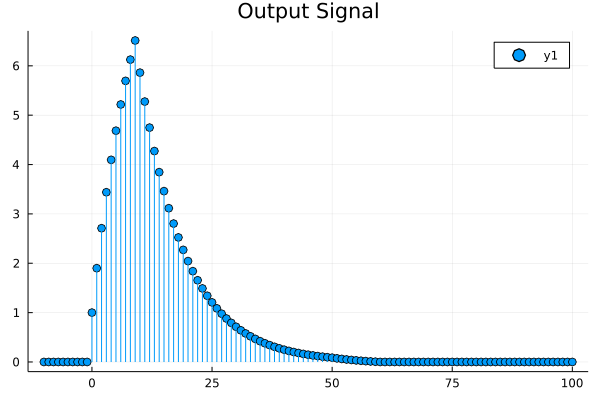

In [38]:
plot(y.n, y.A, line =:stem, marker=:o, title = "Output Signal")

## Another Example

If we have the signals in Array form, we can create them directly:

In [42]:
x = ([3.0, 11.0, 7.0, 0.0, -1.0, 4.0, 2.0], collect(-3:3)) 

([3.0, 11.0, 7.0, 0.0, -1.0, 4.0, 2.0], [-3, -2, -1, 0, 1, 2, 3])

In [43]:
# Can then just splatter the arguments and let Julia take care of the distribution:

x = signal(x...)

signal(Real[3.0, 11.0, 7.0, 0.0, -1.0, 4.0, 2.0], Real[-3, -2, -1, 0, 1, 2, 3])

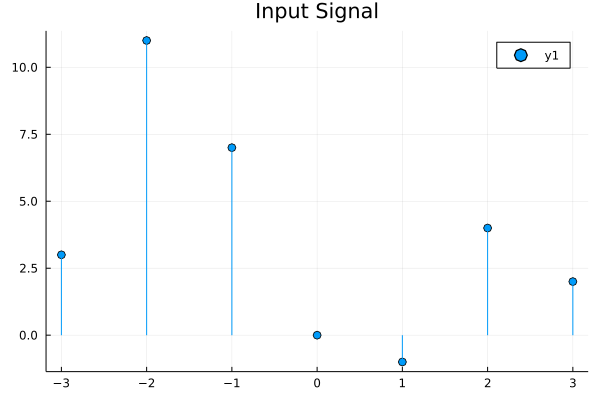

In [44]:
plot(x.n, x.A, line =:stem, marker=:o, title = "Input Signal")

In [46]:
h = ([2.0, 3.0, 0.0, -5.0, 2.0, 1.0], collect(-1:4))

([2.0, 3.0, 0.0, -5.0, 2.0, 1.0], [-1, 0, 1, 2, 3, 4])

In [47]:
h = signal(h...)

signal(Real[2.0, 3.0, 0.0, -5.0, 2.0, 1.0], Real[-1, 0, 1, 2, 3, 4])

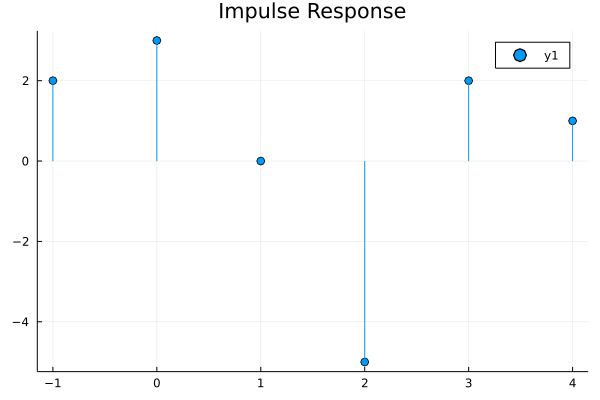

In [48]:
plot(h.n, h.A, line =:stem, marker=:o, title = "Impulse Response")

In [49]:
y = conv(x, h)

signal(Real[5.999999999999997, 31.0, 47.0, 6.0, -51.0, -4.9999999999999964, 41.0, 18.0, -22.0, -3.0, 8.0, 2.0000000000000018], Real[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])

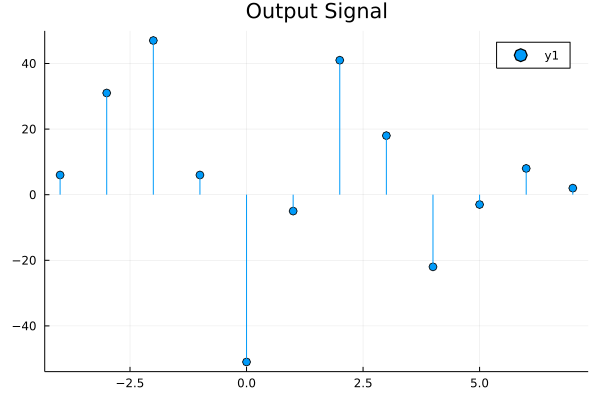

In [50]:
plot(y.n, y.A, line =:stem, marker=:o, title = "Output Signal")

We could verify that Convolution Operation is commutative:


In [51]:
y = conv(h, x)

signal(Real[5.999999999999997, 31.0, 47.0, 6.0, -51.0, -4.9999999999999964, 41.0, 18.0, -22.0, -3.0, 8.0, 2.0000000000000018], Real[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])

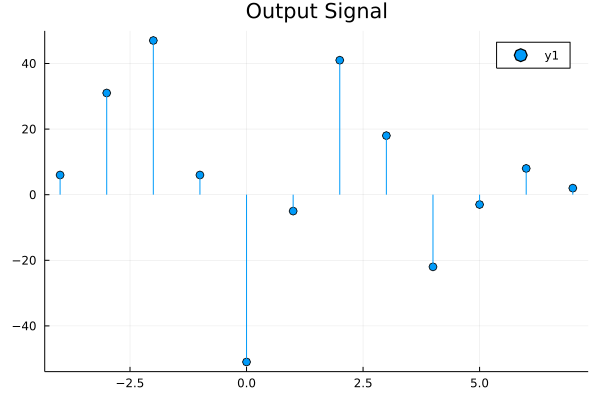

In [52]:
plot(y.n, y.A, line =:stem, marker=:o, title = "Output Signal")